# **ANALIZA IRYSÓW**

# **1. Informacje o danych**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [2]:
df = pd.read_csv('25__iris.csv', sep=",")
df.rename(columns={
    'długość kielicha (sepal length)': 'długość kielicha',
    'szerokość kielicha (sepal width)': 'szerokość kielicha',
    'długość płatka (petal length)': 'długość płatka',
    'szerokość płatka (petal width)': 'szerokość płatka',
    'klasa (class)': 'gatunek',
}, inplace=True)

In [3]:
Markdown(f"""
### Dane zawierają **{len(df)}** wierszy i **{len(df.columns)}** kolumn.
""")


### Dane zawierają **150** wierszy i **5** kolumn.


In [4]:
amount_of_gatunek = df['gatunek'].nunique()
unique_gatunek = df['gatunek'].unique()

Markdown(f"""
### Dane dotyczą **{amount_of_gatunek}** gatunków irysów :
{', '.join(unique_gatunek)}.
""")


### Dane dotyczą **3** gatunków irysów :
Iris-setosa, Iris-versicolor, Iris-virginica.


 ### Większość kolumn zawiera wartości liczbowe wyrażone w centymetrach

In [5]:
sample_df = df.sample(5, random_state=50)
(
    sample_df[["długość kielicha", "szerokość kielicha", "długość płatka", "szerokość płatka", "gatunek"]]
    .style
    .format(precision=1)
    .hide(axis="index")
)

długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,gatunek
5.6,3.0,4.1,1.3,Iris-versicolor
6.3,2.5,4.9,1.5,Iris-versicolor
5.4,3.4,1.7,0.2,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
df["gatunek"].value_counts()

In [ ]:
df[df.duplicated()]

In [ ]:
df.nunique()

In [6]:
counts = df['gatunek'].value_counts()

markdown_text = "### Próbki każdego z gatunków liczą po:\n"

for species, count in counts.items():
    markdown_text += f"- **{species}**: {count} przypadków\n"

Markdown(markdown_text)

### Próbki każdego z gatunków liczą po:
- **Iris-setosa**: 50 przypadków
- **Iris-versicolor**: 50 przypadków
- **Iris-virginica**: 50 przypadków


### Wnioski
- dane są **pełne** (nie posiadają braków),
- możliwe duplikaty, ale raczej są to te same parametry zaobserwowane w próbce danych.

## Irys setosa

#### To niska lecz bardzo urokliwa odmiana kosaćca. Dorasta do 30 centymetrów wysokości i tworzy kępy o podobnej szerokości. Kwiat dość ciekawy pojawia się w czerwcu. Płatki fioletowe z wyraźnym żyłkowaniem. Jest łatwy w uprawie, najlepiej pasuje mu gleba żyzna próchnicza. Lubi stanowisko słoneczne, da sobie radę w półcieniu ale kwitnie będzie mniej obfite. Jest w pełni mrozoodporny. Ze względu na swą wysokość, świetnie nadaje się na obrzeża rabat [(źródło)](https://roslinoholicy.pl/shop/irys-setosa/).

![Irys setosa](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)

## Irys versicolor

#### To rzadko spotykana odmiana, dorastająca docelowo do około 70 cm wysokości. Jej młode pędy mają niezwykle dekoracyjny, fioletowy kolor. Kosaciec ma niebieskie kwiatostany i kwitnie na przełomie maja i czerwca. Roślina tworzy okazałe kępy. Najlepiej rośnie w glebie żyznej i wilgotnej. Najpiękniej prezentuje się nad brzegami oczek wodnych oraz w towarzystwie piwoni. Warto go sadzić w miejscach wypoczynkowych, ponieważ roślina przyciąga motyle. Jest całkowicie odporna na mróz w naszym klimacie [(źródło)](https://hortensje.pl/kosaciec-roznobarwny-iris-versicolor).

![Irys versicolor](https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg)

## Irys virginica

#### To gatunek rośliny pochodzący z południowych terenów podmokłych, występujący od Wirginii po Florydę i Teksas. Ma 90 cm wysokości i jasnozielone liście, które często leżą na ziemi lub w wodzie [(źródło)](https://www.wildflower.org/plants/result.php?id_plant=irvi).

![Irys virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1920px-Iris_virginica_2.jpg)

# **2. Podstawowe statystyki**

In [ ]:
def koloruj_min_max_mean(df):
    """
    Koloruje minimalne (niebieskie tło) i maksymalne (czerwone tło) wartości średnie w DataFrame, zaokrągla do 1 miejsca po przecinku i dodaje linie siatki.
    """
    def koloruj_min(s):
        return ['background-color: lightblue' if v == s.min() else '' for v in s]

    def koloruj_max(s):
        return ['background-color: lightcoral' if v == s.max() else '' for v in s]

    styled_df = df.style.format(precision=1)\
        .apply(koloruj_min, subset=pd.IndexSlice[:, df.columns.get_level_values(1) == 'mean'])\
        .apply(koloruj_max, subset=pd.IndexSlice[:, df.columns.get_level_values(1) == 'mean'])\
        .set_table_styles([{'selector': 'th, td', 'props': [('border', '1px solid black')]}])
    return styled_df

# Załóżmy, że masz już DataFrame o nazwie df

grouped_df = df.groupby('gatunek').agg({
    'długość kielicha': ['mean', 'median', 'std', 'min', 'max'],
    'szerokość kielicha': ['mean', 'median', 'std', 'min', 'max'],
    'długość płatka': ['mean', 'median', 'std', 'min', 'max'],
    'szerokość płatka': ['mean', 'median', 'std', 'min', 'max']
})

# Podział DataFrame na dwie części
kielich_df = grouped_df[['długość kielicha', 'szerokość kielicha']]
platek_df = grouped_df[['długość płatka', 'szerokość płatka']]

# Stylizacja i wyświetlanie obu części
display(koloruj_min_max_mean(kielich_df))
display(koloruj_min_max_mean(platek_df))


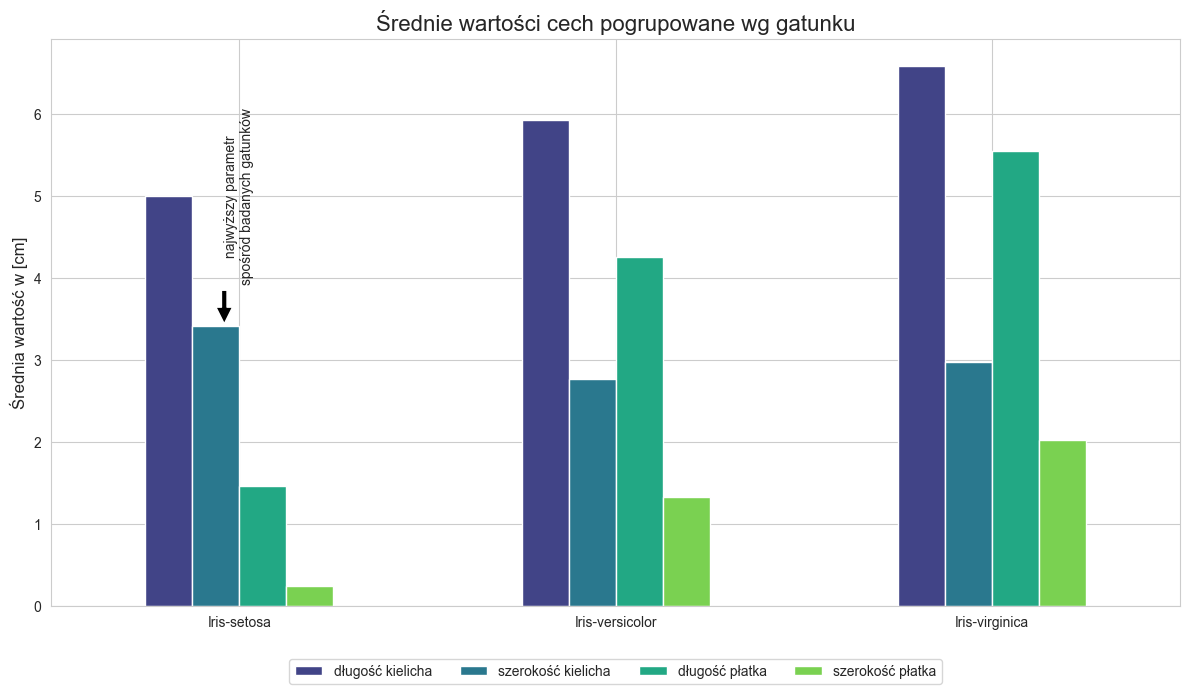

In [7]:
grouped_df = df.groupby('gatunek').mean()

# Ustawienie stylu seaborn i kolorów
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(grouped_df.columns))

# Konwersja indeksu na listę
labels = grouped_df.index.tolist()

ax = grouped_df.plot(kind='bar', figsize=(12, 7), color=colors)

plt.title('Średnie wartości cech pogrupowane wg gatunku', fontsize=16)
plt.xlabel('')
plt.ylabel('Średnia wartość w [cm]', fontsize=12)
plt.xticks(range(len(labels)), labels, rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Umieszczenie legendy na dole z mniejszą przestrzenią
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10)

# Dodanie strzałki i opisu dla "szerokość kielicha" w "Iris-setosa"
iris_setosa_index = labels.index('Iris-setosa')
ax.annotate('najwyższy parametr\nspośród badanych gatunków',
            xy=(iris_setosa_index - 0.04, grouped_df.loc['Iris-setosa', 'szerokość kielicha']),
            xytext=(iris_setosa_index, grouped_df.loc['Iris-setosa', 'szerokość kielicha'] + 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=90)

plt.tight_layout()
plt.savefig('bar_chart_legend_closer.png')
plt.show()

In [ ]:
df.plot(kind='box', by='gatunek', figsize=(20,10), grid=True)

### Wnioski
1. Spośród 4 badanych cech, gatunek **setosa** wyróżnia się **trzema minimami** dla wartości średnich - długość kielicha (5,0 cm), długość płatka (1,5 cm) i szerokość płatka (0,2 cm); oraz **jednym maksimum** - szerokość kielicha (3,4 cm). 
2. Gatunek **virginica** cechuje się **najwyższymi wartościami średnimi w 3 parametrach** - długość kielicha (6,6 cm), długość płatka (5,6 cm) i szerokość płatka (2,0 cm).

## Zbadano korelacje między poszczególnymi cechami kwiatów.

### W wyniku czego wykryto dwie dodatnie korelacje.

In [ ]:
sns.scatterplot(data=df, x='długość kielicha', y='szerokość kielicha', hue='gatunek')
plt.show()

In [ ]:
df[["długość kielicha", "szerokość kielicha"]].corr()

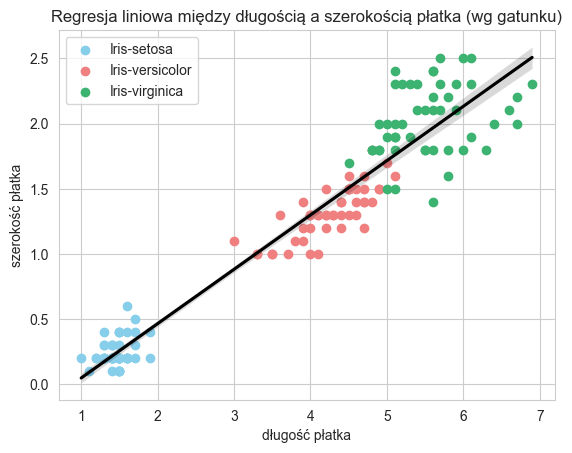

In [8]:
kolory = {'Iris-setosa': 'skyblue', 'Iris-versicolor': 'lightcoral', 'Iris-virginica': 'mediumseagreen'}

for gatunek in df['gatunek'].unique():
    gatunek_df = df[df['gatunek'] == gatunek]
    plt.scatter(gatunek_df['długość płatka'], gatunek_df['szerokość płatka'], label=gatunek, color=kolory[gatunek])

# Rysowanie linii regresji dla całego zbioru
sns.regplot(x='długość płatka', y='szerokość płatka', data=df, scatter=False, color='black')

plt.title('Regresja liniowa między długością a szerokością płatka (wg gatunku)')
plt.xlabel('długość płatka')
plt.ylabel('szerokość płatka')
plt.legend()

plt.savefig('reg_długość_a_szerokość_płatka.png')
plt.show()

In [9]:
correlation = df[["długość płatka", "szerokość płatka"]].corr().iloc[0, 1]

markdown_text = f"""
### Istnieje dodatnia korelacja (**{correlation:.2f}**) między długością a szerokością płatka.
"""

Markdown(markdown_text)


### Istnieje dodatnia korelacja (**0.96**) między długością a szerokością płatka.


In [ ]:
sns.scatterplot(data=df, x="długość płatka", y="szerokość płatka", hue='gatunek')
plt.show()

In [ ]:
df[["długość płatka", "szerokość płatka"]].corr()

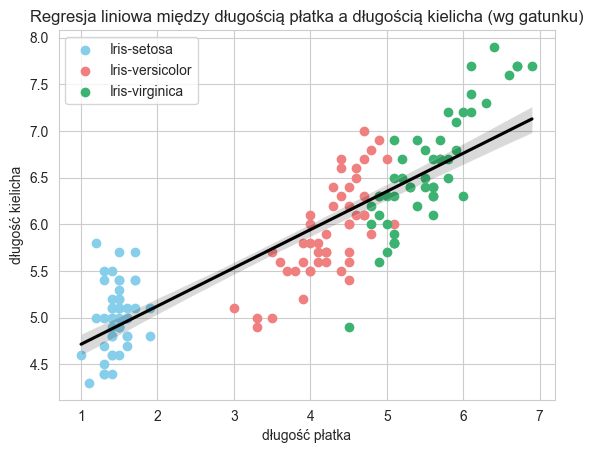

In [10]:
kolory = {'Iris-setosa': 'skyblue', 'Iris-versicolor': 'lightcoral', 'Iris-virginica': 'mediumseagreen'}

for gatunek in df['gatunek'].unique():
    gatunek_df = df[df['gatunek'] == gatunek]
    plt.scatter(gatunek_df['długość płatka'], gatunek_df['długość kielicha'], label=gatunek, color=kolory[gatunek])

# Rysowanie linii regresji dla całego zbioru
sns.regplot(x='długość płatka', y='długość kielicha', data=df, scatter=False, color='black')

plt.title('Regresja liniowa między długością płatka a długością kielicha (wg gatunku)')
plt.xlabel('długość płatka')
plt.ylabel('długość kielicha')
plt.legend()

plt.savefig('reg_długość_kielicha_a_długość_płatka.png')
plt.show()

In [11]:
correlation = df[["długość kielicha", "długość płatka"]].corr().iloc[0, 1]

markdown_text = f"""
### Istnieje dodatnia korelacja (**{correlation:.2f}**) między długością kielicha a długością płatka.
"""

Markdown(markdown_text)


### Istnieje dodatnia korelacja (**0.87**) między długością kielicha a długością płatka.


In [ ]:
sns.scatterplot(data=df, x="długość kielicha", y="długość płatka", hue='gatunek')
plt.show()

In [ ]:
df[["długość kielicha", "długość płatka"]].corr()

In [ ]:
sns.scatterplot(data=df, x="szerokość kielicha", y="szerokość płatka", hue='gatunek')
plt.show()

In [ ]:
df[["szerokość kielicha", "szerokość płatka"]].corr()

# **3. Podsumowanie**

1. Otrzymane dane są kompletne, zawierają pomiary **3 gatunków irysów** po **50 przypadków** każdy (łącznie próba liczy 150 obiektów).
2. Spośród badanych gatunków **irys setosa** wyróżnia się **najdrobniejszymi płatkami kwiatów**, za to jego **kielich jest najszerszy**.
3. Istnieje **dodatnia korelacja** między **długością a szerokością płatka**.
4. Istnieje **dodatnia korelacja** między **długością kielicha a długością płatka**.
5. **Próba** okazała się **wystarczająco liczna** do obliczeń **podstawowych statystyk**, które **zobrazowały różnice kwiatów** wybranych trzech gatunków irysów.

In [12]:
!jupyter nbconvert iris.ipynb --to html --SkipSlideCellsPreprocessor.enabled=True --no-input --no-prompt

[NbConvertApp] Converting notebook iris.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 453690 bytes to iris.html
